In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
from sklearn import preprocessing

df = pd.read_csv('final_data.csv')

In [2]:
emp_scoreA = pd.read_csv(r"Questionnaire_datasetIA.csv", encoding= 'unicode_escape') 
emp_scoreB = pd.read_csv(r"Questionnaire_datasetIB.csv", encoding= 'unicode_escape')

In [3]:
# Checking for the percentage of null values of each column
null_percentages = df.apply(lambda x: (x.isnull().sum() / len(df)) * 100)
print(null_percentages)

Unnamed: 0.1                  0.00
Unnamed: 0                    0.00
Recording timestamp           0.00
Computer timestamp            0.00
Sensor                        0.07
                              ... 
Fixation point Y             46.92
Fixation point X (MCSnorm)   51.47
Fixation point Y (MCSnorm)   51.47
Mouse position X             98.92
Mouse position Y             98.92
Length: 72, dtype: float64


In [4]:
# Define the list of columns to drop
cols_to_drop = ['Export date','Recording date','Recording date UTC',
                'Recording start time', 'Recording start time UTC',
                'Recording duration', 'Recording software version',
                'Recording resolution height', 'Recording resolution width',
                'Recording monitor latency', 'Recording timestamp',
                'Presented Stimulus name', 'Presented Media name',
                'Computer timestamp', 'Participant name', 'Recording name',
                'Timeline name', 'Recording Fixation filter name',
                'Unnamed: 0', 'Event', 'Event value',
                'Pupil diameter left', 'Pupil diameter right',
                'Fixation point X', 'Fixation point Y',
                'Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)',
                'Mouse position X', 'Mouse position Y',
                'Eyetracker timestamp', 'Presented Media height',
                'Presented Media position Y (DACSpx)']

# Drop the specified columns
df = df.drop(columns=cols_to_drop)

In [5]:
cols = ['Validity left', 'Validity right', 'Sensor']
for col in cols:
    df[col].fillna('Not Recorded', inplace=True)

In [6]:
df.drop('Unnamed: 0.1',axis = 1,inplace = True)

In [7]:
df.head()

,Sensor,Project name,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,...,Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Presented Media width,Presented Media position X (DACSpx),Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index
0,Not Recorded,Test group experiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,117.00,64.00
1,Not Recorded,Test group experiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,117.00,64.00
2,Eye Tracker,Test group experiment,962.00,346.00,943.00,290.00,980.00,402.00,"0,07366","0,00290",...,"0,2685","0,5135","0,3721",1493.00,214.00,897.00,649.00,Fixation,117.00,64.00
3,Eye Tracker,Test group experiment,962.00,350.00,912.00,292.00,1012.00,409.00,"0,06367","0,00355",...,"0,2703","0,5350","0,3785",1493.00,214.00,897.00,649.00,Fixation,117.00,64.00
4,Eye Tracker,Test group experiment,962.00,346.00,912.00,292.00,1012.00,400.00,"0,06370","0,00355",...,"0,2703","0,5350","0,3701",1493.00,214.00,897.00,649.00,Fixation,117.00,64.00


In [8]:
df['Eye movement type'].unique()

array(['Fixation', 'Saccade', 'Unclassified', 'EyesNotFound', nan],
      dtype=object)

In [9]:
#Replacing the , to . for these columns and convert their type from object to float
string_replace = ['Eye position left X (DACSmm)',
 'Eye position left Y (DACSmm)',
 'Eye position left Z (DACSmm)',
 'Eye position right X (DACSmm)',
 'Eye position right Y (DACSmm)',
 'Eye position right Z (DACSmm)',
 'Gaze point left X (DACSmm)',
 'Gaze point left Y (DACSmm)',
 'Gaze point right X (DACSmm)',
 'Gaze point right Y (DACSmm)',
 'Gaze point X (MCSnorm)',
 'Gaze point Y (MCSnorm)',
 'Gaze point left X (MCSnorm)',
 'Gaze point left Y (MCSnorm)',
 'Gaze point right X (MCSnorm)',
 'Gaze point right Y (MCSnorm)',
 'Gaze direction left X',
 'Gaze direction left Y',
 'Gaze direction left Z',
 'Gaze direction right X',
 'Gaze direction right Y',
 'Gaze direction right Z']

# Convert the type of the column from object to float
df[string_replace] = df[string_replace].astype(str).replace(',', '.', regex=True).astype(float)


In [17]:
import gc
from sklearn import preprocessing

def clean_data(df):
    # Clear memory
    gc.collect()
    
    # Mean Columns
    mean_columns = ['Gaze point X',
     'Gaze point Y',
     'Gaze point left X',
     'Gaze point left Y',
     'Gaze point right X',
     'Gaze point right Y',
     'Gaze direction left X',
     'Gaze direction left Y',
     'Gaze direction left Z',
     'Gaze direction right X',
     'Gaze direction right Y',
     'Gaze direction right Z',
     'Eye position left X (DACSmm)',
     'Eye position left Y (DACSmm)',
     'Eye position left Z (DACSmm)',
     'Eye position right X (DACSmm)',
     'Eye position right Y (DACSmm)',
     'Eye position right Z (DACSmm)',
     'Gaze point left X (DACSmm)',
     'Gaze point left Y (DACSmm)',
     'Gaze point right X (DACSmm)',
     'Gaze point right Y (DACSmm)',
     'Gaze point X (MCSnorm)',
     'Gaze point Y (MCSnorm)',
     'Gaze point left X (MCSnorm)',
     'Gaze point left Y (MCSnorm)',
     'Gaze point right X (MCSnorm)',
     'Gaze point right Y (MCSnorm)',
     'Gaze direction left X',
     'Gaze direction left Y',
     'Gaze direction left Z',
     'Gaze direction right X',
     'Gaze direction right Y',
     'Gaze direction right Z']

    # Fill NaN values in each column with the mean of those column
    for col in df[mean_columns]:
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)
        print("Done",col)

    # Drop rows with NaN values
    df.dropna(inplace=True)

    # Remove Test group experiment and Control group experiment from the final dataframe
    final_df = df[~(df['Project name'] == 'Test group experiment') & ~(df['Project name'] == 'Control group experiment')]

    # Convert columns to Label Encoders
    label_converter = ['Sensor', 'Validity left', 'Validity right', 'Eye movement type', 'Project name']
    le = preprocessing.LabelEncoder()
    for i in label_converter:
        final_df[i] = le.fit_transform(final_df[i])

    final_df.reset_index(drop=True, inplace=True)
    
    return final_df


In [21]:
final_df = clean_data(df)

Done Gaze point X
Done Gaze point Y
Done Gaze point left X
Done Gaze point left Y
Done Gaze point right X
Done Gaze point right Y
Done Gaze direction left X
Done Gaze direction left Y
Done Gaze direction left Z
Done Gaze direction right X
Done Gaze direction right Y
Done Gaze direction right Z
Done Eye position left X (DACSmm)
Done Eye position left Y (DACSmm)
Done Eye position left Z (DACSmm)
Done Eye position right X (DACSmm)
Done Eye position right Y (DACSmm)
Done Eye position right Z (DACSmm)
Done Gaze point left X (DACSmm)
Done Gaze point left Y (DACSmm)
Done Gaze point right X (DACSmm)
Done Gaze point right Y (DACSmm)
Done Gaze point X (MCSnorm)
Done Gaze point Y (MCSnorm)
Done Gaze point left X (MCSnorm)
Done Gaze point left Y (MCSnorm)
Done Gaze point right X (MCSnorm)
Done Gaze point right Y (MCSnorm)
Done Gaze direction left X
Done Gaze direction left Y
Done Gaze direction left Z
Done Gaze direction right X
Done Gaze direction right Y
Done Gaze direction right Z


In [22]:
df.shape, final_df.shape

((4840501, 39), (2896852, 39))

In [23]:
final_df.head()

,Sensor,Project name,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,...,Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Presented Media width,Presented Media position X (DACSpx),Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index
0,0,1,1027.00,336.00,989.00,283.00,1065.00,390.00,0.05,-0.10,...,0.26,0.57,0.36,1493.00,214.00,2000.00,1447.00,1,400.00,13.00
1,0,1,1032.00,338.00,992.00,284.00,1071.00,392.00,0.05,-0.10,...,0.26,0.57,0.36,1493.00,214.00,2000.00,1447.00,1,400.00,13.00
2,0,1,1030.00,341.00,990.00,287.00,1070.00,396.00,0.05,-0.09,...,0.27,0.57,0.37,1493.00,214.00,2000.00,1447.00,1,400.00,13.00
3,0,1,1026.00,337.00,984.00,281.00,1067.00,393.00,0.05,-0.10,...,0.26,0.57,0.36,1493.00,214.00,2000.00,1447.00,1,400.00,13.00
4,0,1,1027.00,337.00,988.00,280.00,1067.00,394.00,0.05,-0.10,...,0.26,0.57,0.36,1493.00,214.00,2000.00,1447.00,1,400.00,13.00


In [24]:
final_df.corr().transpose()

,Sensor,Project name,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,...,Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Presented Media width,Presented Media position X (DACSpx),Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index
Sensor,1.00,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.02,-0.02,...,0.01,0.01,0.01,0.01,-0.01,-0.02,-0.02,-0.01,0.01,0.00
Project name,0.01,1.00,0.02,0.05,-0.03,0.06,0.06,0.04,-0.03,-0.13,...,0.04,0.07,0.02,0.08,-0.09,-0.12,-0.13,-0.00,-0.02,-0.08
Gaze point X,0.01,0.02,1.00,-0.13,0.92,-0.14,0.89,-0.10,0.90,-0.13,...,-0.08,0.82,-0.07,-0.01,0.01,-0.07,-0.07,-0.04,0.00,-0.01
Gaze point Y,0.00,0.05,-0.13,1.00,-0.13,0.93,-0.10,0.93,-0.12,0.71,...,0.77,-0.08,0.79,-0.01,0.01,0.05,0.05,-0.05,-0.01,0.04
Gaze point left X,0.01,-0.03,0.92,-0.13,1.00,-0.15,0.76,-0.09,0.98,-0.15,...,-0.09,0.70,-0.06,0.01,-0.01,-0.06,-0.06,-0.01,-0.00,0.01
Gaze point left Y,0.00,0.06,-0.14,0.93,-0.15,1.00,-0.11,0.84,-0.14,0.77,...,0.83,-0.08,0.73,-0.01,0.01,0.05,0.05,-0.03,-0.01,0.05
Gaze point right X,0.01,0.06,0.89,-0.10,0.76,-0.11,1.00,-0.10,0.74,-0.10,...,-0.07,0.92,-0.08,-0.02,0.02,-0.08,-0.08,-0.07,0.01,-0.03
Gaze point right Y,0.00,0.04,-0.10,0.93,-0.09,0.84,-0.10,1.00,-0.08,0.60,...,0.72,-0.08,0.85,-0.01,0.01,0.06,0.06,-0.02,-0.01,0.04
Gaze direction left X,0.02,-0.03,0.90,-0.12,0.98,-0.14,0.74,-0.08,1.00,-0.15,...,-0.08,0.69,-0.05,-0.00,0.00,-0.06,-0.06,-0.03,0.00,0.03
Gaze direction left Y,-0.02,-0.13,-0.13,0.71,-0.15,0.77,-0.10,0.60,-0.15,1.00,...,0.65,-0.08,0.54,0.01,-0.01,0.06,0.06,-0.01,-0.03,0.01


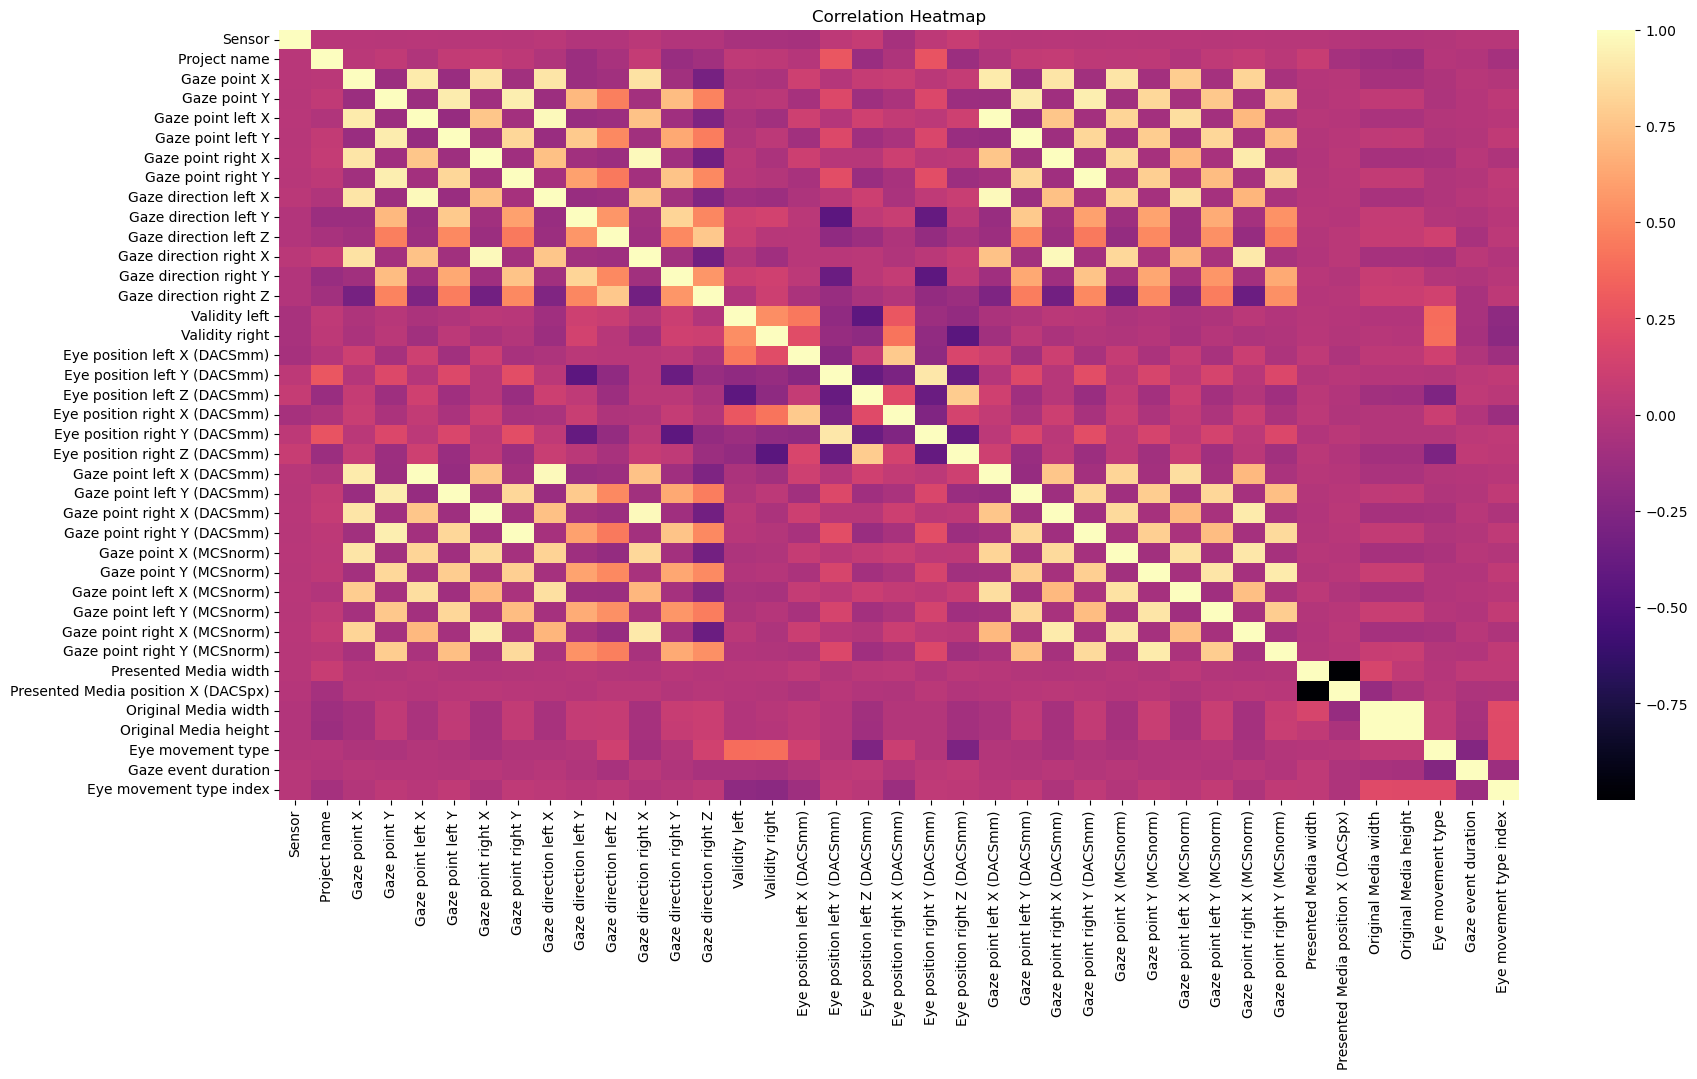

In [26]:
def plot_corr_heatmap(final_df):
    corr_matrix = final_df.corr().transpose()
    plt.figure(figsize=(20, 10))
    sns.heatmap(corr_matrix, cmap='magma')
    plt.title('Correlation Heatmap')
    plt.show()
plot_corr_heatmap(final_df)

In [27]:
final_df.duplicated().sum()

330740

In [28]:
final_df.drop_duplicates(inplace = True)

In [29]:
final_df.isnull().sum().sum()

0

In [30]:
final_df['Sensor'].unique()

array([0, 1])

In [31]:
final_df.drop('Sensor',axis = 1,inplace = True)

In [32]:
final_df['Project name'].unique()

array([ 1,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 45, 27, 29, 31,
       33, 35, 37, 39, 43, 48, 42, 44, 47,  5, 11, 13, 15, 17, 19, 21, 23,
       25, 26, 28, 30, 32, 34, 36, 38, 46, 40, 41,  0,  3,  7,  9])

In [33]:
#seperating dependent and independent variable x,y
X = final_df.drop('Eye movement type',axis = 1)
y = final_df['Eye movement type']

In [34]:
from sklearn.model_selection import train_test_split

#splitting the data into training 67 % and testing 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
X_train.shape,y_train.shape

((1719295, 37), (1719295,))

In [36]:
X_test.shape,y_test.shape

((846817, 37), (846817,))

In [37]:
gc.collect()

24494

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

classify_1 = GaussianNB()
classify_1.fit(X_train,y_train)

GaussianNB()

In [39]:
pred1 = classify_1.predict(X_test)

In [40]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     28962
           1       0.92      0.95      0.93    503262
           2       0.57      0.57      0.57    150496
           3       0.77      0.66      0.71    164097

    accuracy                           0.83    846817
   macro avg       0.78      0.79      0.78    846817
weighted avg       0.82      0.83      0.82    846817



In [41]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

c1 = LogisticRegression()
c1.fit(X_train,y_train)

LogisticRegression()

In [42]:
pred2 = c1.predict(X_test)

In [43]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.48      0.39      0.43     28962
           1       0.97      0.98      0.97    503262
           2       0.63      0.62      0.63    150496
           3       0.72      0.74      0.73    164097

    accuracy                           0.85    846817
   macro avg       0.70      0.68      0.69    846817
weighted avg       0.84      0.85      0.85    846817



In [44]:
# Empathy Score

In [48]:
def get_final_empathy_scores(emp_scoreA, emp_scoreB):
    final_empathy_scoreA_columns = []
    for i in emp_scoreA.columns:
        if emp_scoreA[i].dtypes != 'O':
            final_empathy_scoreA_columns.append(i)

    final_empathy_scoreA = emp_scoreA[final_empathy_scoreA_columns]
    final_empathy_scoreB = emp_scoreB[final_empathy_scoreA_columns]
    
    return final_empathy_scoreA, final_empathy_scoreB

final_empathy_scoreA, final_empathy_scoreB = get_final_empathy_scores(emp_scoreA, emp_scoreB)

In [49]:
final_empathy_scoreA.drop('NR',axis = 1,inplace = True)
final_empathy_scoreB.drop('NR',axis = 1,inplace = True)

In [50]:
final_empathy_scoreA.describe()

,Participant nr,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",I often get emotionally involved with my friends problems.,I am inclined to get nervous when others around me seem to be nervous.,People I am with have a strong influence on my mood.,...,I complete the sentences of other people when they find it difficult to communicate their ideas to help them.,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original
count,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,...,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00
mean,30.50,2.32,2.62,3.47,3.48,3.03,3.38,3.22,2.78,3.13,...,3.30,2.33,3.45,3.42,2.68,2.55,3.07,2.95,121.85,94.98
std,17.46,0.97,0.92,0.60,0.72,0.80,0.72,0.72,0.83,0.79,...,0.72,0.93,0.75,0.62,1.05,1.00,0.90,0.72,12.02,10.06
min,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,94.00,69.00
25%,15.75,2.00,2.00,3.00,3.00,3.00,3.00,3.00,2.00,3.00,...,3.00,2.00,3.00,3.00,2.00,2.00,3.00,2.75,114.75,87.75
50%,30.50,2.00,3.00,4.00,4.00,3.00,3.50,3.00,3.00,3.00,...,3.00,2.00,4.00,3.00,3.00,2.00,3.00,3.00,121.00,95.50
75%,45.25,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,...,4.00,3.00,4.00,4.00,4.00,3.00,4.00,3.00,131.00,103.25
max,60.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,143.00,115.00


In [51]:
final_empathy_scoreA.corr()

,Participant nr,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",I often get emotionally involved with my friends problems.,I am inclined to get nervous when others around me seem to be nervous.,People I am with have a strong influence on my mood.,...,I complete the sentences of other people when they find it difficult to communicate their ideas to help them.,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original
Participant nr,1.00,0.22,0.11,-0.07,-0.18,-0.12,-0.20,-0.17,-0.04,0.11,...,0.19,0.07,0.02,-0.15,-0.18,-0.00,0.10,0.03,-0.14,-0.02
I sometimes find it difficult to see things from the other guys point of view.,0.22,1.00,0.35,-0.08,0.24,0.27,-0.06,-0.08,-0.06,0.05,...,0.25,0.07,0.27,-0.25,-0.23,0.17,0.15,0.17,0.15,0.27
"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",0.11,0.35,1.00,-0.29,0.05,-0.01,0.02,-0.03,0.27,0.23,...,0.10,-0.01,0.01,-0.19,-0.22,-0.02,0.34,-0.03,0.21,0.37
I try to look at everybodys side of a disagreement before I make a decision.,-0.07,-0.08,-0.29,1.00,0.25,0.22,0.29,0.04,-0.17,-0.17,...,0.06,-0.04,0.36,0.06,0.27,0.16,-0.09,0.17,0.23,0.35
I sometimes try to understand my friends better by imagining how things look from their perspective.,-0.18,0.24,0.05,0.25,1.00,0.56,0.26,0.25,0.09,-0.14,...,0.01,-0.07,0.22,0.03,0.07,0.19,0.03,0.24,0.51,0.45
"When I am upset at someone, I usually try to put myself in his shoes for a while.",-0.12,0.27,-0.01,0.22,0.56,1.00,0.30,0.25,0.14,-0.01,...,0.19,-0.17,0.14,0.11,0.05,0.04,-0.26,0.30,0.34,0.59
"Before criticising somebody, I try to imagine how I would feel if I was in their place.",-0.20,-0.06,0.02,0.29,0.26,0.30,1.00,0.13,0.17,-0.18,...,0.10,-0.25,0.34,0.28,0.14,-0.04,-0.04,0.14,0.26,0.52
I often get emotionally involved with my friends problems.,-0.17,-0.08,-0.03,0.04,0.25,0.25,0.13,1.00,0.11,0.13,...,0.23,-0.01,-0.12,0.25,0.05,-0.26,0.00,0.25,0.19,0.24
I am inclined to get nervous when others around me seem to be nervous.,-0.04,-0.06,0.27,-0.17,0.09,0.14,0.17,0.11,1.00,0.41,...,0.03,-0.19,-0.06,0.01,-0.06,-0.39,-0.14,-0.02,-0.05,0.34
People I am with have a strong influence on my mood.,0.11,0.05,0.23,-0.17,-0.14,-0.01,-0.18,0.13,0.41,1.00,...,0.02,0.17,-0.25,-0.29,-0.23,-0.33,-0.20,0.04,-0.14,0.10


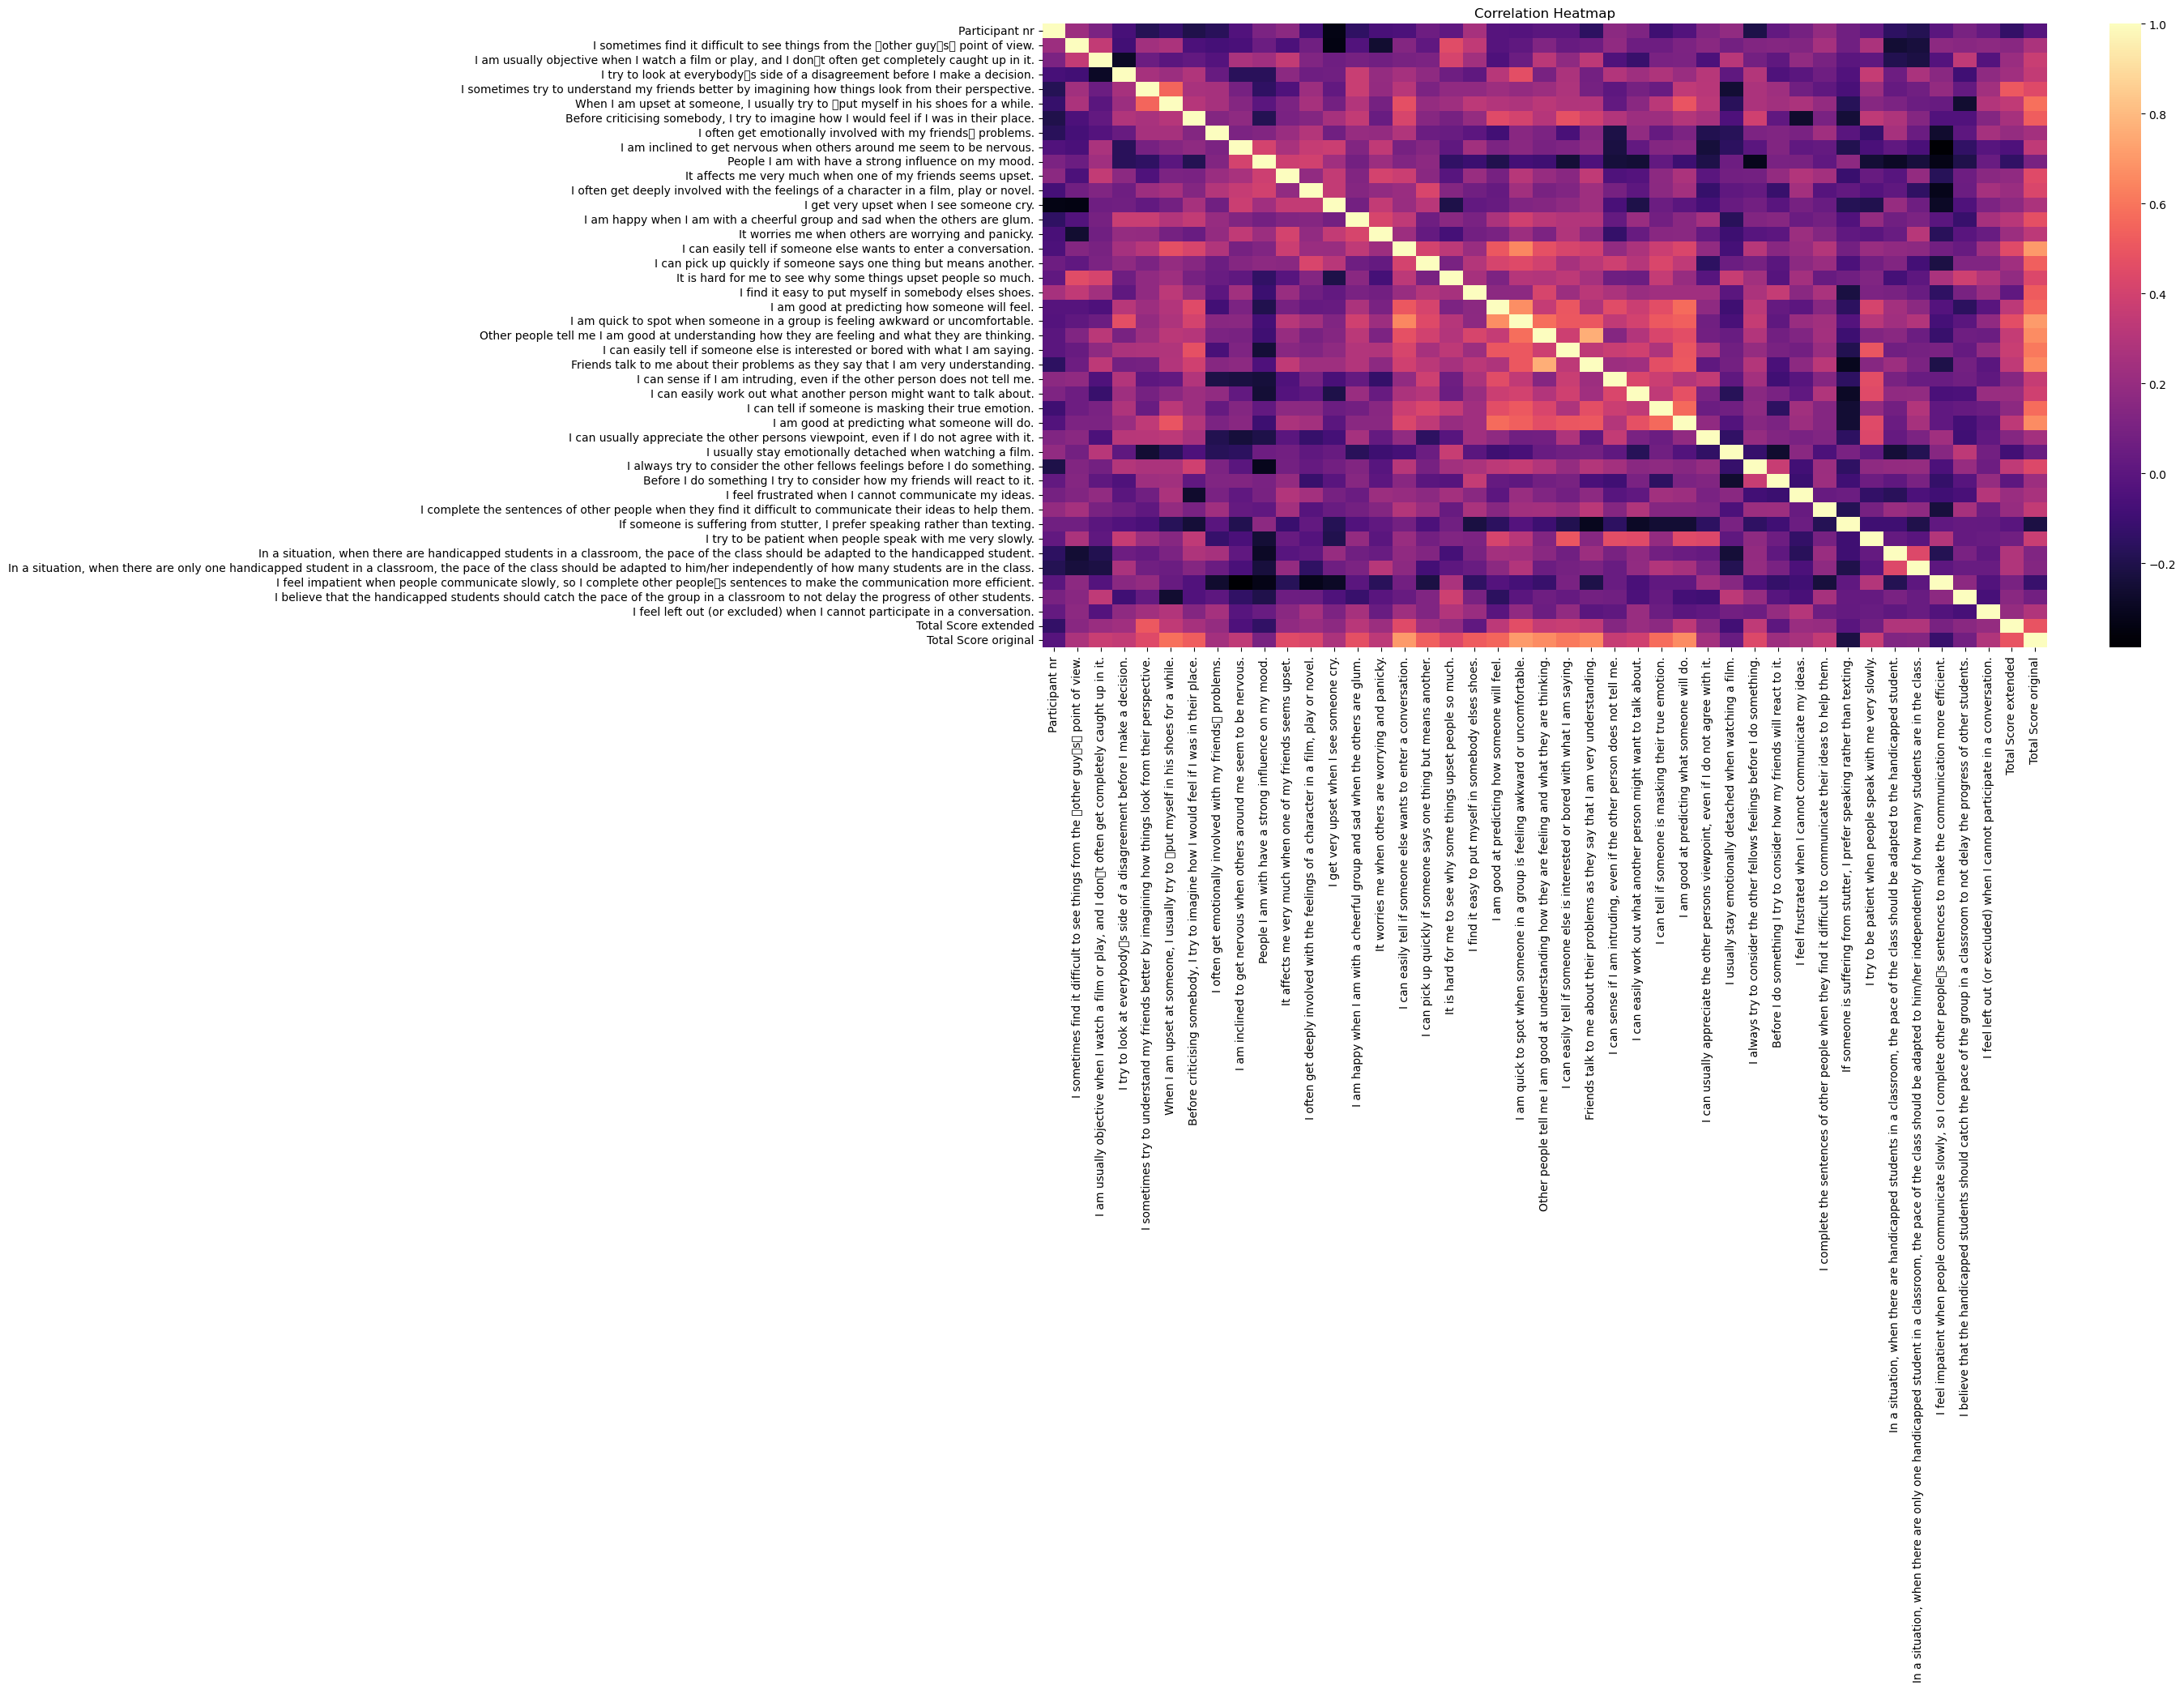

In [52]:
plot_corr_heatmap(final_empathy_scoreA)

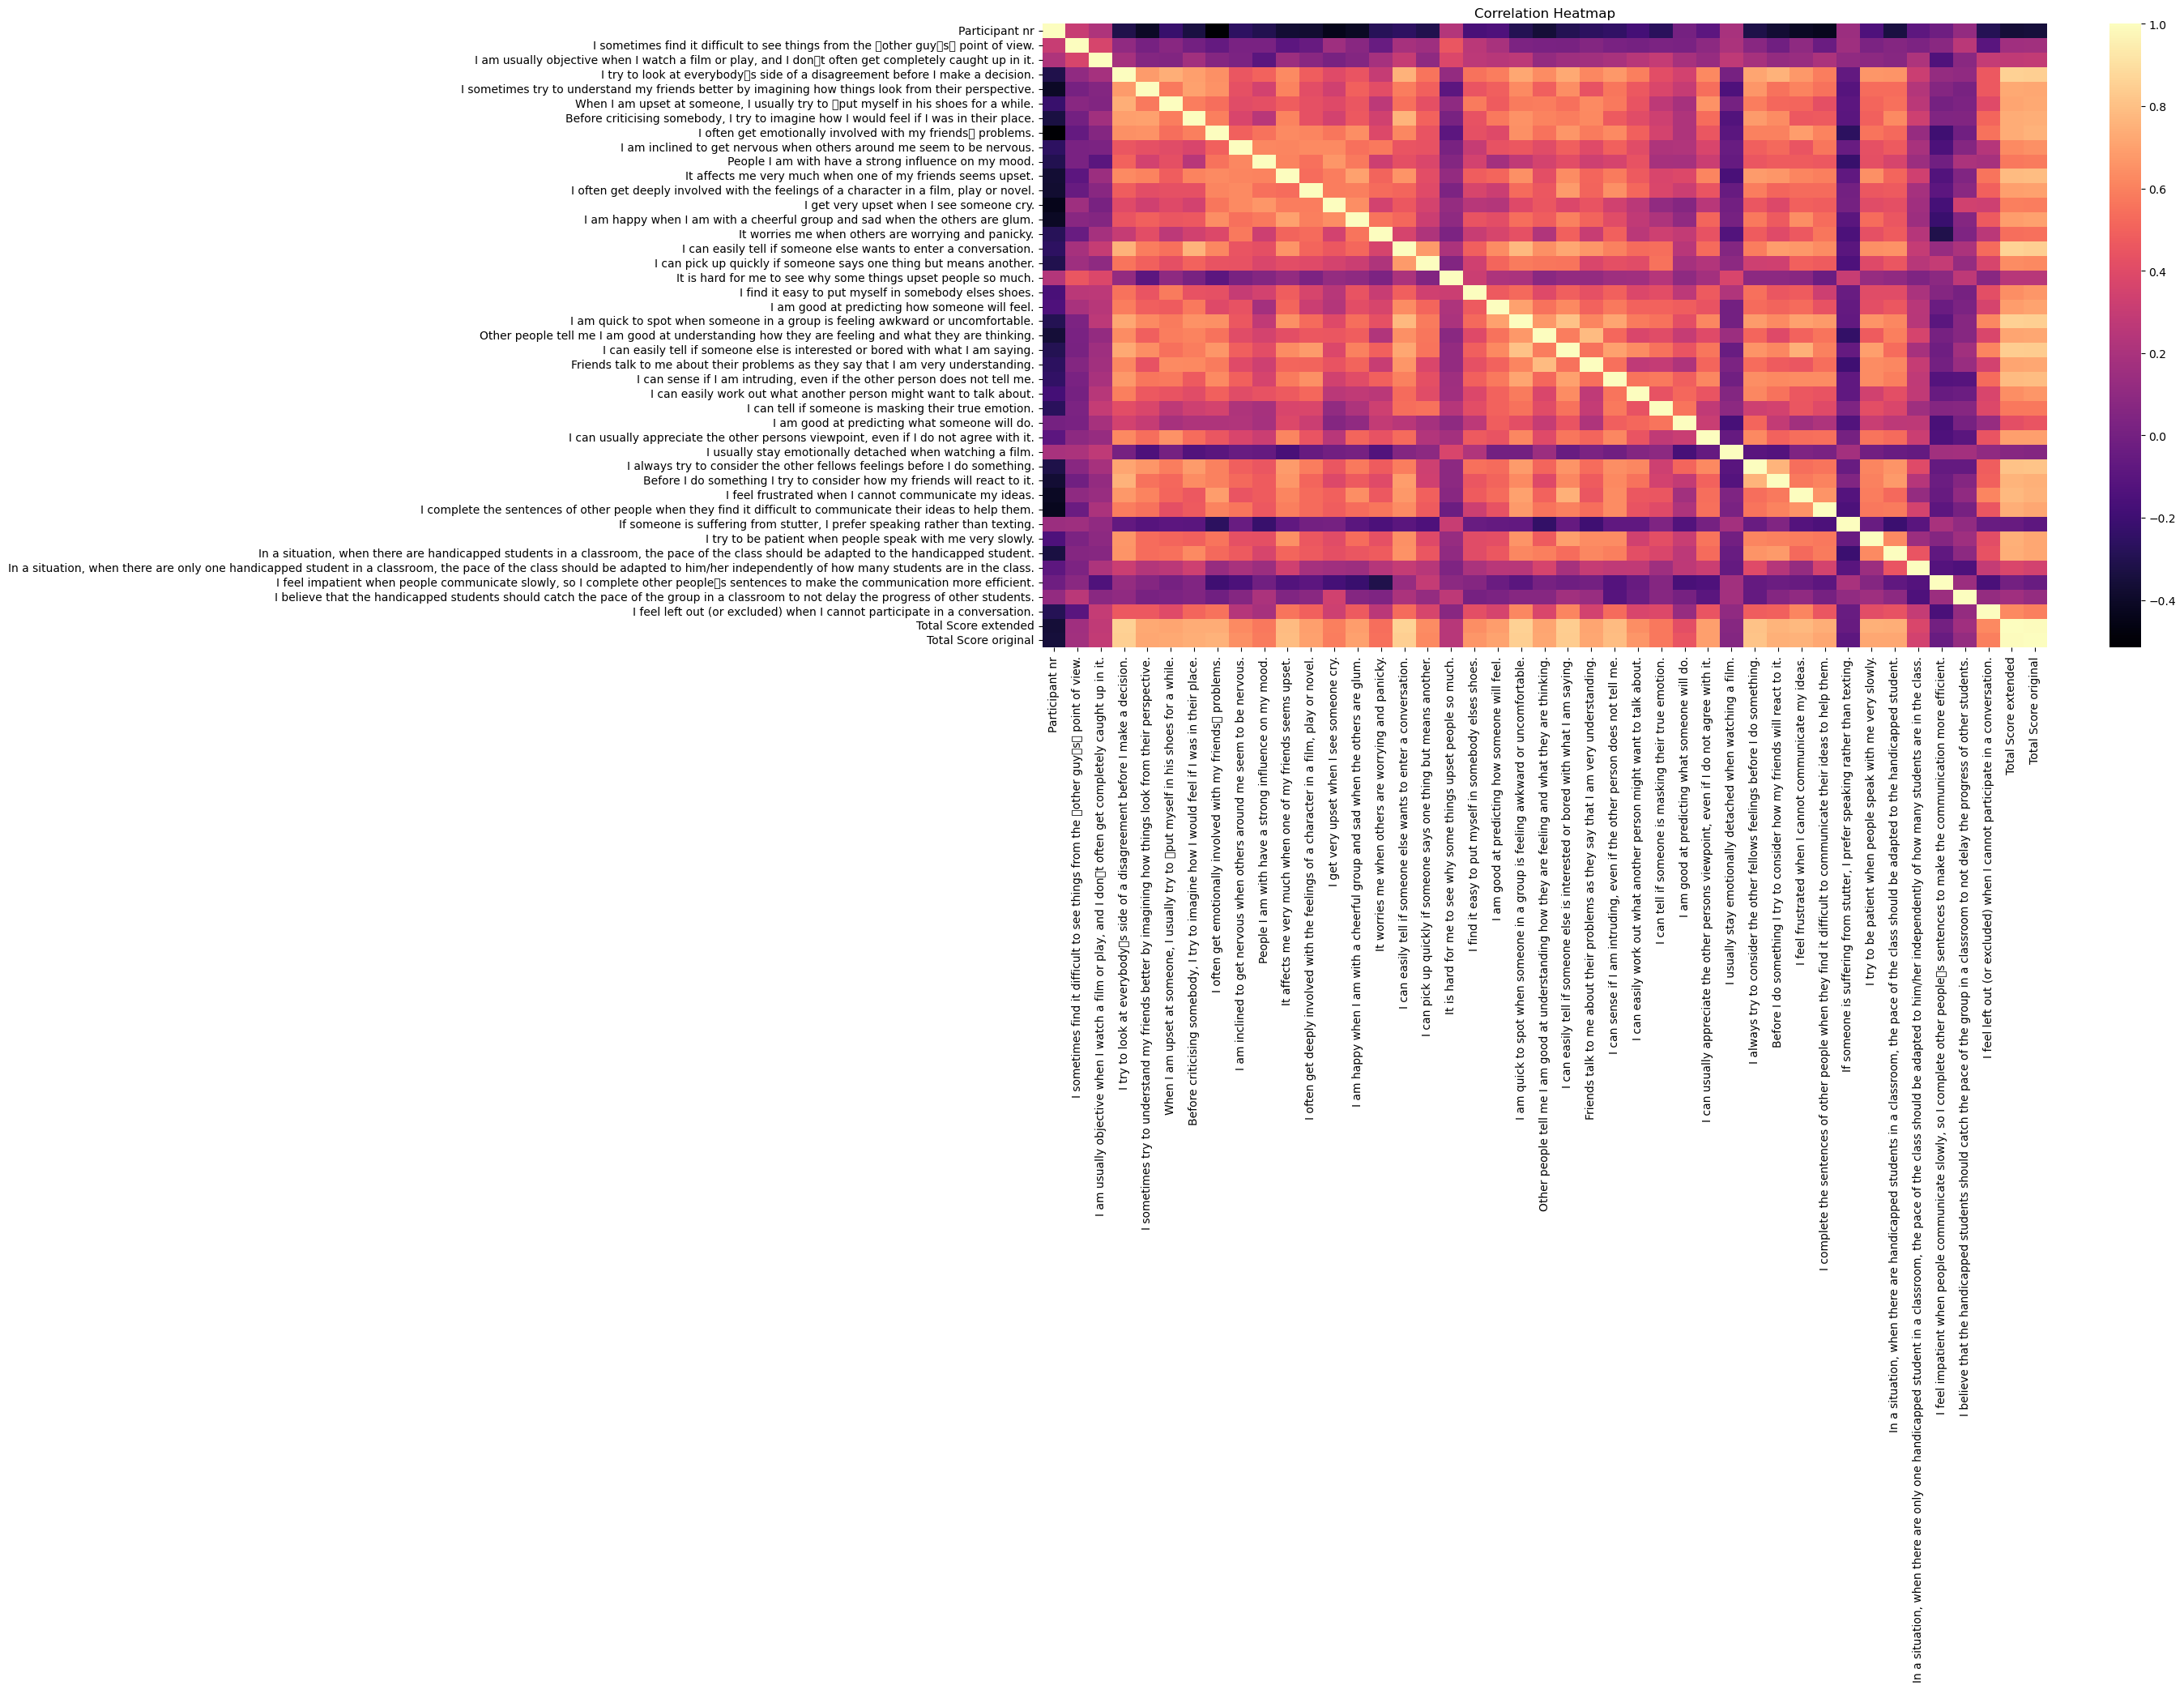

In [53]:
plot_corr_heatmap(final_empathy_scoreB)

In [54]:
def prepare_empathy_training_data(final_empathy_scoreA):
    X1_train = final_empathy_scoreA.drop('Total Score extended', axis=1)
    y1_train = final_empathy_scoreA['Total Score extended']
    return X1_train, y1_train

X1_train, y1_train = prepare_empathy_training_data(final_empathy_scoreA)

In [55]:
def prepare_empathyB_data():
    #making EmpathyB csv for testing the empathy score
    X1_test = final_empathy_scoreB.drop('Total Score extended',axis = 1)
    y1_test = final_empathy_scoreB['Total Score extended']
    return X1_test, y1_test

X1_test, y1_test = prepare_empathyB_data()

In [56]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

def linear_regression(X_train, y_train, X_test, y_test):
    predict_1 = LinearRegression()
    predict_1.fit(X_train, y_train)
    score_predicted1 = predict_1.predict(X_test)
    
    mse = mean_squared_error(y_test, score_predicted1)
    r2 = r2_score(y_test, score_predicted1)
    rmse = math.sqrt(mse)
    
    print('Root mean square of LR for predicting empathy score is:', rmse)
    print('R2 of LR for predicting empathy score is:', r2)
    
    return rmse, r2

rmse, r2 = linear_regression(X1_train, y1_train, X1_test, y1_test)

Root mean square of LR for predicting empathy score is: 19.311740595281652
R2 of LR for predicting empathy score is: 0.18798855139648862


In [58]:
# Random Forest
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

def random_forest_regression(X_train, y_train, X_test, y_test):
    predict_2 = RandomForestClassifier()
    predict_2.fit(X_train, y_train)
    score_predicted2 = predict_2.predict(X_test)
    mse_1 = mean_squared_error(y_test, score_predicted2)
    r2_1 = r2_score(y_test, score_predicted2)
    print('Root mean square of RF for predicting empathy score is:- ', math.sqrt(mse_1))
    print('R2 of RF for predicting empathy score is:- ', r2_1)


In [59]:
random_forest_regression(X1_train, y1_train, X1_test, y1_test)

Root mean square of RF for predicting empathy score is:-  17.19447585708852
R2 of RF for predicting empathy score is:-  0.3562797111441739
